# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar EDA and visualization process as what we did in the FTE. Create at least 2 EDA plots, and create a HTML file with an auto-EDA analysis using pandas-profiling or another auto-EDA Python package. Write a short analysis at the end of the assignment in markdown. 

## Data science process steps this week
We will carry out the first two parts of the CRISP-DM data science process this week:

1. Business understanding

This is customer churn data for a telecommunications company. Customers can have phone as well as other services. The company is looking to reduce customer churn, where customers stop using the company's services and cancel their account. The 'Churn' column has a binary target, yes or no, that denotes if a customer churned. We want to create a machine learning model to predict the Churn target using the other available data in the dataset. Ideally, we will deploy this model to integrate with the company's database, so that a churn risk column is created for each customer. This will enable customer service reps and others to devise and use strategies to reduce churn.


2. Data understanding

Carry out some EDA as we did in the FTE, such as using pandas-profiling. Create a histogram like we did in the FTE, where we plot a numeric column with the target as the 'hue'. Optional challenge: create other plots with the target as the hue, such as bar plots for the categorical columns.

In [1]:
!conda install -c conda-forge pandas-profiling  openpyxl -y

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [8]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     ----------- --------------------------- 30.7/107.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 107.3/107.3 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/359.5 kB ? eta -:--:--
   ---------------------------- ----------- 256.0/359.5 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 359.5/359.5 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/409.3 kB ? eta -:--:--
   -------------------------------- ------ 337.9/409.3 kB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 409.3/409.3 kB 8.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.9 MB 16.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/1.9 MB 7.4 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/1.9 MB 7.9 MB/s eta 0:00:01
   ----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [9]:
import pandas as pd
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# we can give an index number or name for our index column, or leave it blank
df = pd.read_csv('churn_data.csv', index_col='customerID')
df

tenure PhoneService        Contract              PaymentMethod  \
customerID                                                                   
7590-VHVEG       1           No  Month-to-month           Electronic check   
5575-GNVDE      34          Yes        One year               Mailed check   
3668-QPYBK       2          Yes  Month-to-month               Mailed check   
7795-CFOCW      45           No        One year  Bank transfer (automatic)   
9237-HQITU       2          Yes  Month-to-month           Electronic check   
...            ...          ...             ...                        ...   
6840-RESVB      24          Yes        One year               Mailed check   
2234-XADUH      72          Yes        One year    Credit card (automatic)   
4801-JZAZL      11           No  Month-to-month           Electronic check   
8361-LTMKD       4          Yes  Month-to-month               Mailed check   
3186-AJIEK      66          Yes        Two year  Bank transfer (automatic)   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes  
...                    ...           ...   ...  
6840-RESVB           84.80       1990.50    No  
2234-XADUH          103.20       7362.90    No  
4801-JZAZL           29.60        346.45    No  
8361-LTMKD           74.40        306.60   Yes  
3186-AJIEK          105.65       6844.50    No  

[7043 rows x 7 columns]

In [11]:
df.head()

tenure PhoneService        Contract              PaymentMethod  \
customerID                                                                   
7590-VHVEG       1           No  Month-to-month           Electronic check   
5575-GNVDE      34          Yes        One year               Mailed check   
3668-QPYBK       2          Yes  Month-to-month               Mailed check   
7795-CFOCW      45           No        One year  Bank transfer (automatic)   
9237-HQITU       2          Yes  Month-to-month           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes

In [12]:
df.tail()

tenure PhoneService        Contract              PaymentMethod  \
customerID                                                                   
6840-RESVB      24          Yes        One year               Mailed check   
2234-XADUH      72          Yes        One year    Credit card (automatic)   
4801-JZAZL      11           No  Month-to-month           Electronic check   
8361-LTMKD       4          Yes  Month-to-month               Mailed check   
3186-AJIEK      66          Yes        Two year  Bank transfer (automatic)   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
6840-RESVB           84.80       1990.50    No  
2234-XADUH          103.20       7362.90    No  
4801-JZAZL           29.60        346.45    No  
8361-LTMKD           74.40        306.60   Yes  
3186-AJIEK          105.65       6844.50    No

In [13]:
# use the argument minimal=True to speed this up, although you won't get all the plots and stats
report = ProfileReport(df)
report.to_file('churn_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 698.2+ KB


In [15]:
df.describe(include='all')

tenure PhoneService        Contract     PaymentMethod  \
count   7043.000000         7043            7043              7043   
unique          NaN            2               3                 4   
top             NaN          Yes  Month-to-month  Electronic check   
freq            NaN         6361            3875              2365   
mean      32.371149          NaN             NaN               NaN   
std       24.559481          NaN             NaN               NaN   
min        0.000000          NaN             NaN               NaN   
25%        9.000000          NaN             NaN               NaN   
50%       29.000000          NaN             NaN               NaN   
75%       55.000000          NaN             NaN               NaN   
max       72.000000          NaN             NaN               NaN   

        MonthlyCharges  TotalCharges Churn  
count      7043.000000   7032.000000  7043  
unique             NaN           NaN     2  
top                NaN           NaN    No  
freq               NaN           NaN  5174  
mean         64.761692   2283.300441   NaN  
std          30.090047   2266.771362   NaN  
min          18.250000     18.800000   NaN  
25%          35.500000    401.450000   NaN  
50%          70.350000   1397.475000   NaN  
75%          89.850000   3794.737500   NaN  
max         118.750000   8684.800000   NaN

In [16]:
df.tenure.median()

29.0

In [17]:
col = df.columns
col

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.MonthlyCharges

customerID
7590-VHVEG     29.85
5575-GNVDE     56.95
3668-QPYBK     53.85
7795-CFOCW     42.30
9237-HQITU     70.70
               ...  
6840-RESVB     84.80
2234-XADUH    103.20
4801-JZAZL     29.60
8361-LTMKD     74.40
3186-AJIEK    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

<Axes: xlabel='tenure'>

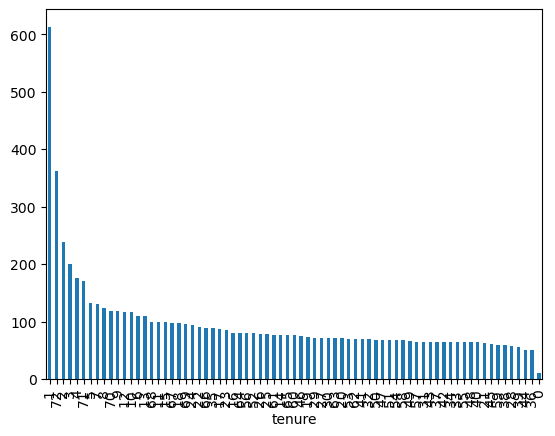

In [19]:
df['tenure'].value_counts().plot.bar()

<Axes: xlabel='tenure'>

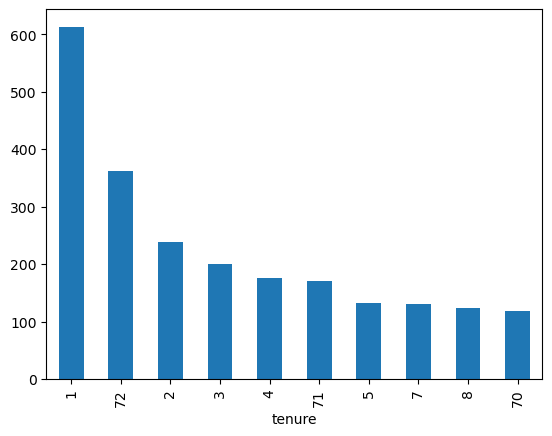

In [20]:
df['tenure'].value_counts()[:10].plot.bar()

<Axes: >

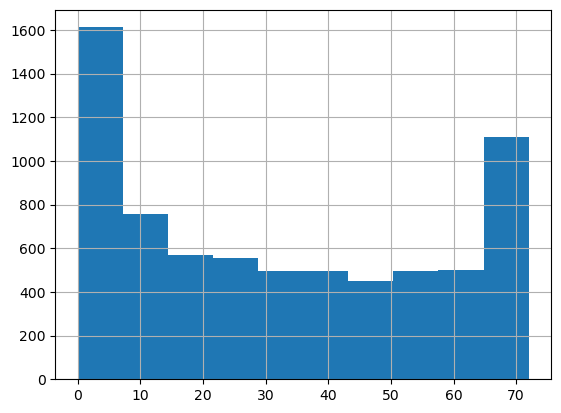

In [21]:
df['tenure'].hist()

<Axes: ylabel='Frequency'>

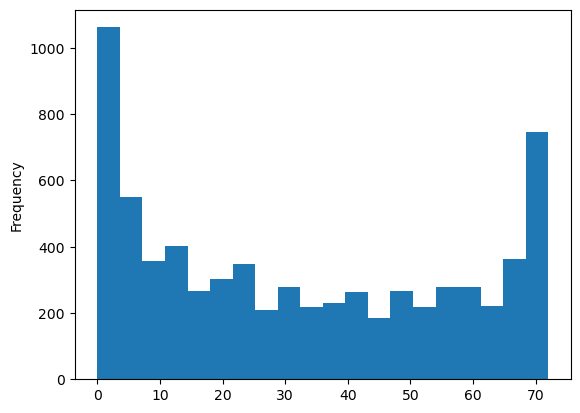

In [23]:
df['tenure'].plot.hist(bins=20)
# this has Yes and No Churn data so there are two spikes

<Axes: >

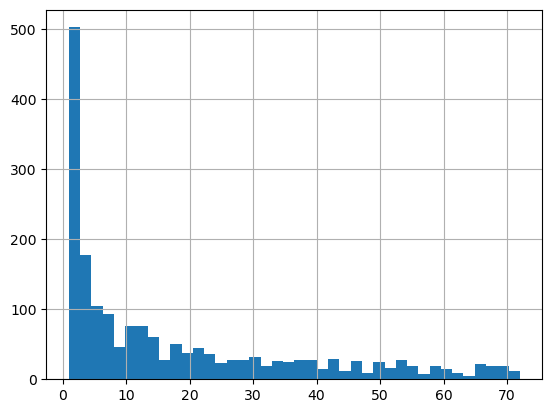

In [24]:
df[df.Churn=='Yes'].tenure.hist(bins=40)
# found this on stack overlow, filtered on Churn=Yes to get a clearer view of churn by tenure

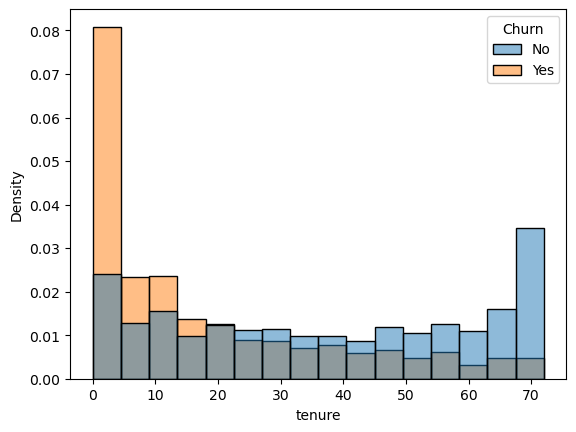

In [25]:
import phik
import seaborn as sns

_ = sns.histplot(data=df, x='tenure', hue='Churn', stat='density', common_norm=False)

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


<Axes: >

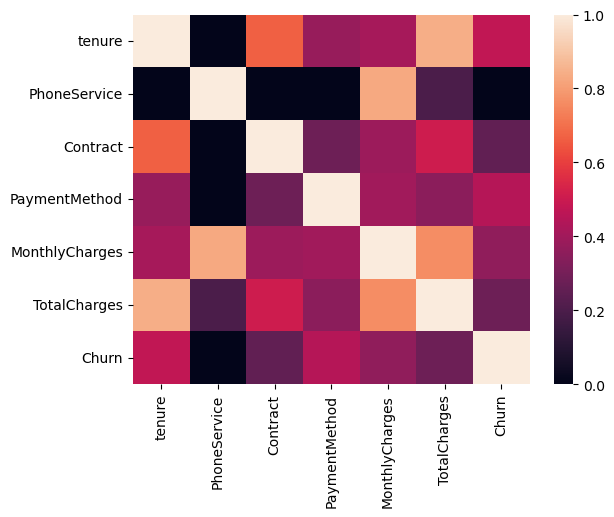

In [27]:
sns.heatmap(df.phik_matrix())

Churn has a large peak around a tenure of 1; tenure ranges from 1 to 72.  The churn column has many more customers without churn that with churn.